In [1]:
import pandas as pd
import os

In [2]:
import pickle

In [3]:
edu_car_df = pd.read_csv('../../clean_data/all_edu_car.csv', index_col=0)

In [4]:
edu_car_df.head()

,goal_first_step,default_goal_type,is_questioned,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,goal_domain_key_pos,goal_name_key_pos,goal_weight,goal_words,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,goal_aver_word_len,label_education,label_attractor_career
0,"Не знаю, с чего начать","Получить знания в новой области, Приобрести но...",0,0,0,1,0,творчество создание новый личный финансы работ...,отстать поезд современность,0.7017,5,1,2,0,0,0,6.00,0,1
1,"Не знаю, с чего начать","Получить знания в новой области, Приобрести но...",1,0,0,1,0,универсальный компетенция гибкий навык личный ...,самореализация,0.0082,1,0,1,0,0,0,14.00,0,1
2,Сменить работу,Включиться в новый проект/деятельность,0,1,0,1,0,иностранный язык гуманитарный знание навык ино...,образ жизнь,0.0431,3,0,2,0,0,0,6.67,0,0
3,поиск необходимой информации,Развить имеющиеся знания и навыки,0,1,0,1,0,прикладной знание навык ручной труд прикладной...,обновление устаревший информация,0.6316,3,0,2,0,1,0,10.00,1,1
4,С анализа,"Получить знания в новой области, Приобрести но...",0,1,0,1,0,универсальный компетенция гибкий навык творчес...,повышение результативность труд,0.1768,3,0,3,0,0,0,10.00,1,0


In [5]:
edu_car = edu_car_df.copy()

In [6]:
edu_car_text_vectors = edu_car[['goal_name_key_pos', 'label_education', 'label_attractor_career']]
edu_car_features = edu_car.drop(columns=['goal_first_step', 'default_goal_type', 'goal_domain_key_pos', 'goal_name_key_pos'])

In [7]:
from sklearn.model_selection import train_test_split

### Career

#### Features approach

In [8]:
car_features = edu_car_features.drop(columns=['label_education'])

In [9]:
X = car_features.drop('label_attractor_career', axis=1)
y = car_features['label_attractor_career']

In [10]:
X.shape

(17118, 13)

In [11]:
y.shape

(17118,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,is_questioned,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,goal_weight,goal_words,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,goal_aver_word_len
11336,0,0,0,0,1,1.0034,2,0,2,0,0,0,10.00
1786,0,1,1,1,0,0.0065,2,0,1,0,1,0,11.00
2008,0,1,0,1,0,0.0082,1,0,1,0,0,0,14.00
17498,1,1,0,1,1,0.0055,3,1,1,0,1,0,10.33
4958,0,1,0,1,1,0.0375,3,0,3,0,0,0,8.33


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mms = MinMaxScaler()

In [16]:
X_train_scaled = mms.fit_transform(X_train)

In [17]:
X_test_scaled = mms.fit_transform(X_test)

In [18]:
from xgboost import XGBClassifier

In [19]:
car_xgb = XGBClassifier()

In [20]:
car_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = car_xgb.predict(X_test_scaled)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2263
           1       0.37      0.27      0.31      1161

    accuracy                           0.60      3424
   macro avg       0.52      0.52      0.51      3424
weighted avg       0.57      0.60      0.58      3424



In [24]:
accuracy_score(y_test, y_pred)

0.5969626168224299

In [25]:
f1_score(y_test, y_pred)

0.31137724550898205

In [26]:
roc_auc_score(y_test, y_pred)

0.5170447863107329

In [32]:
with open('models/career_feat_xgb.pkl', 'wb') as f:
    pickle.dump(car_xgb, f)

#### Vectors approach

In [27]:
car_vectors = edu_car_text_vectors.drop(columns=['label_education'])

In [28]:
car_vectors.dropna(inplace=True)

In [29]:
car_vectors.columns

Index(['goal_name_key_pos', 'label_attractor_career'], dtype='object')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
text = car_vectors['goal_name_key_pos']
y = car_vectors['label_attractor_career']

In [32]:
text

0                              отстать поезд современность
1                                           самореализация
2                                              образ жизнь
3                         обновление устаревший информация
4                          повышение результативность труд
                               ...                        
18013    приобретение новый знание навык успешный обуче...
18014                             быть нужный работодатель
18016                                   сохранить здоровье
18018                                  зарабатывать деньга
18019                                      получение навык
Name: goal_name_key_pos, Length: 16953, dtype: object

In [33]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [34]:
X.shape

(16953, 4600)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [36]:
X_train

<13562x4600 sparse matrix of type '<class 'numpy.float64'>'
	with 47055 stored elements in Compressed Sparse Row format>

In [37]:
car_v_xgb = XGBClassifier()

In [38]:
car_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = car_v_xgb.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77      2212
           1       0.32      0.04      0.08      1179

    accuracy                           0.63      3391
   macro avg       0.48      0.50      0.42      3391
weighted avg       0.53      0.63      0.53      3391



In [41]:
accuracy_score(y_test, y_pred)

0.6349159539958714

In [42]:
f1_score(y_test, y_pred)

0.07611940298507462

In [43]:
roc_auc_score(y_test, y_pred)

0.4967641225975364

In [49]:
with open('models/career_vect_xgb.pkl', 'wb') as f:
    pickle.dump(car_v_xgb, f)

#### Neural net approach

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [45]:
text = car_vectors['goal_name_key_pos']
y = car_vectors['label_attractor_career']

In [46]:
token = Tokenizer()
token.fit_on_texts(text)

In [47]:
vocab_size = len(token.word_index) + 1
vocab_size

4619

In [48]:
encoded_text = token.texts_to_sequences(text)

In [49]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

127

In [50]:
max_length = 127
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [51]:
X.shape

(16953, 127)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [53]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 127, 100)          461900    
_________________________________________________________________
conv1d (Conv1D)              (None, 126, 32)           6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 63, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 63, 32)            1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 63, 16)            5

In [55]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 74.8 ms


In [56]:
import numpy as np

In [57]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [60]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13562 samples, validate on 3391 samples
Epoch 1/600
13562/13562 [==============================] - 8s 599us/sample - loss: 0.6489 - accuracy: 0.6512 - val_loss: 0.6520 - val_accuracy: 0.6523
Epoch 2/600
13562/13562 [==============================] - 7s 537us/sample - loss: 0.6473 - accuracy: 0.6522 - val_loss: 0.6556 - val_accuracy: 0.6523
Epoch 3/600
13562/13562 [==============================] - 7s 526us/sample - loss: 0.6459 - accuracy: 0.6522 - val_loss: 0.6577 - val_accuracy: 0.6523
Epoch 4/600
13562/13562 [==============================] - 7s 542us/sample - loss: 0.6455 - accuracy: 0.6522 - val_loss: 0.6582 - val_accuracy: 0.6523
Epoch 5/600
13562/13562 [==============================] - 8s 558us/sample - loss: 0.6402 - accuracy: 0.6522 - val_loss: 0.6623 - val_accuracy: 0.6523
Epoch 6/600
13562/13562 [==============================] - 8s 558us/sample - loss: 0.6309 - accuracy: 0.6521 - val_loss: 0.6659 - val_accuracy: 0.6523
Epoch 7/600
13562/13562 [====================

In [61]:
losses = pd.DataFrame(model.history.history)

In [62]:
losses[['accuracy','val_accuracy']].plot()

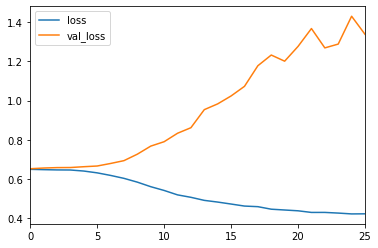

In [63]:
losses[['loss','val_loss']].plot()

In [64]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.338394545517429, 0.6015924]


In [65]:
y_pred = model.predict_classes(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      2212
           1       0.32      0.13      0.19      1179

    accuracy                           0.60      3391
   macro avg       0.48      0.49      0.46      3391
weighted avg       0.53      0.60      0.55      3391



In [67]:
accuracy_score(y_test, y_pred)

0.6015924506045415

In [68]:
f1_score(y_test, y_pred)

0.18663455749548466

In [69]:
roc_auc_score(y_test, y_pred)

0.4918186635623103

In [75]:
model.save("models/career_vect_nn.h5")